**OASIS INFOBYTE INTERNSHIP**

**TASK:5 SALES PREDICTION USING PYTHON**

**BY:Sooraj AlI panhwar**

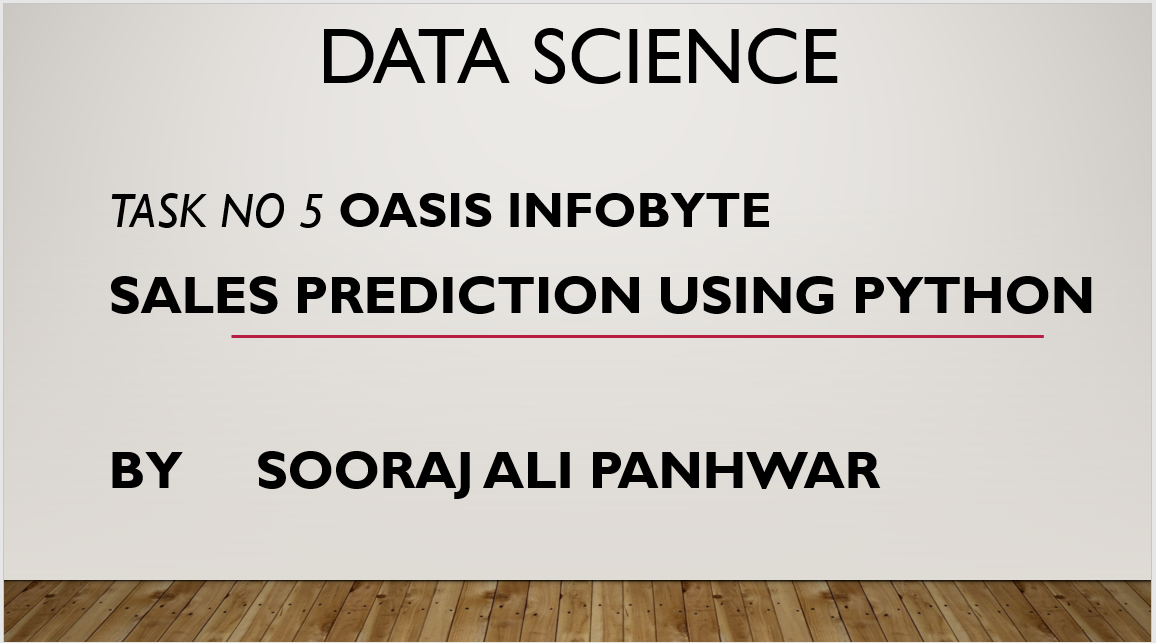

In [57]:
from IPython import display
display.Image("introduction.png")

**Importing Libraries**

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Loading the Data set**

In [33]:
advdf = pd.read_csv("Advertising.csv")

**Display first rows of the dataset**

In [34]:
print("First few rows of the dataset:")
print(advdf.head())

First few rows of the dataset:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


Display last rows of the dataset

In [35]:
print("\nLast few rows of the dataset:")
print(advdf.tail())


Last few rows of the dataset:
     Unnamed: 0     TV  Radio  Newspaper  Sales
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4


**Display shape of the dataset**

In [36]:
print("\nShape of the dataset:")
print(advdf.shape)


Shape of the dataset:
(200, 5)


**Display size of the dataset**

In [37]:
print("\nSize of the dataset:")
print(advdf.size)


Size of the dataset:
1000


**Display column names**

In [38]:
print("\nColumn names:")
print(advdf.columns)


Column names:
Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


Dropping the unnecessary column

In [39]:
advdf = advdf.drop(columns=["Unnamed: 0"])

Display first 2 rows to confirm the column drop

In [40]:
print("\nFirst 2 rows after dropping the 'Unnamed: 0' column:")
print(advdf.head(2))


First 2 rows after dropping the 'Unnamed: 0' column:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4


 Display info about the dataset

In [41]:
print("\nInformation about the dataset:")
print(advdf.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


Display data types of each column

In [42]:
print("\nData types of each column:")
print(advdf.dtypes)



Data types of each column:
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


Display descriptive statistics

In [43]:
print("\nDescriptive statistics:")
print(advdf.describe())


Descriptive statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


**Display correlation matrix**

In [44]:
print("\nCorrelation matrix:")
print(advdf.corr())


Correlation matrix:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


**Checking for missing values**

In [45]:
print("\nMissing values count:")
print(advdf.isnull().sum())


Missing values count:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


**Checking for duplicate rows**

In [46]:
duplicate_count = advdf.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_count)


Number of duplicate rows: 0


**Scatter plots for Sales vs TV, Newspaper, Radio**

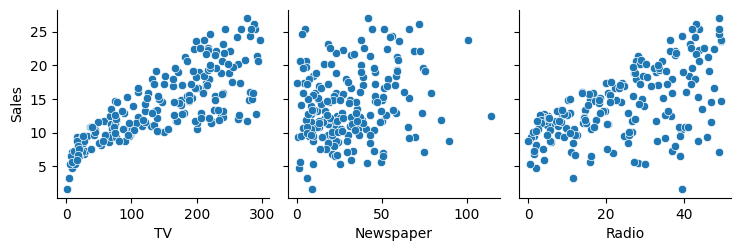

In [47]:
sns.pairplot(advdf, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', kind='scatter')
plt.show()

**Checking for outliers using boxplots**

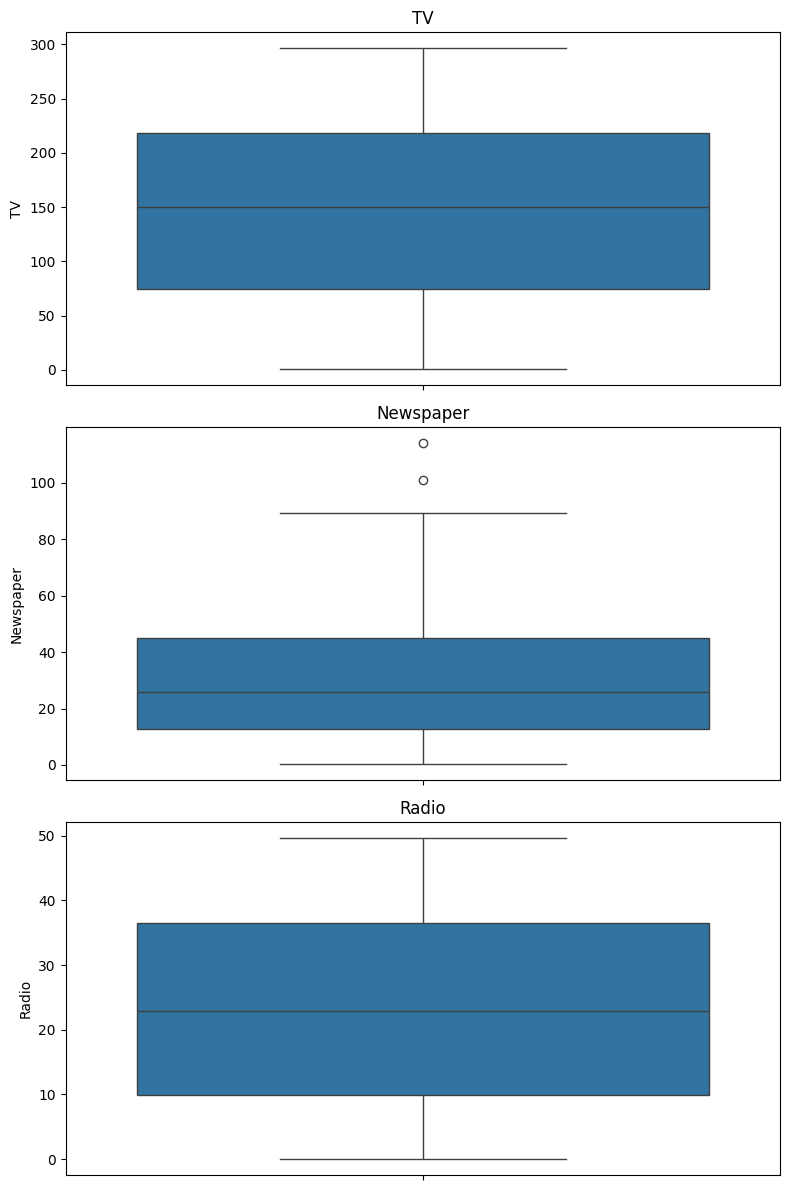

In [48]:
fig, axs = plt.subplots(3, figsize=(8, 12))
sns.boxplot(data=advdf['TV'], ax=axs[0]).set_title('TV')
sns.boxplot(data=advdf['Newspaper'], ax=axs[1]).set_title('Newspaper')
sns.boxplot(data=advdf['Radio'], ax=axs[2]).set_title('Radio')
plt.tight_layout()
plt.show()

**Correlation heatmap**

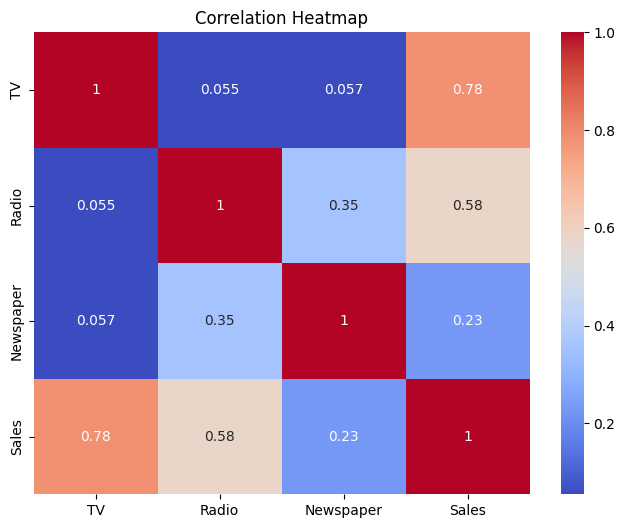

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(advdf.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Split the data into features (X) and target (y)**

In [50]:
X = advdf.drop('Sales', axis=1)
y = advdf['Sales']

** Split the dataset into training and testing sets**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


**Initialize and train the Linear Regression model**

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Make predictions on the test set**

In [53]:
y_predictions = model.predict(X_test)

**Display model coefficients**

In [54]:
print("\nModel intercept:", model.intercept_)
print("Model coefficients:", model.coef_)


Model intercept: 2.99489303049533
Model coefficients: [ 0.04458402  0.19649703 -0.00278146]


**Create a DataFrame to compare actual and predicted values**

In [55]:
comparison_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_predictions.flatten()})
print("\nComparison of actual and predicted values (first 10 rows):")
print(comparison_df.head(10))


Comparison of actual and predicted values (first 10 rows):
   Actual  Predicted
0    11.3  10.057396
1     8.4   7.452281
2     8.7   7.019708
3    25.4  24.080297
4    11.7  12.017863
5     8.7   6.537939
6     7.2  12.782869
7    13.2  15.109746
8     9.2  10.769740
9    16.6  16.343580


**Evaluate the model**

In [56]:
mae = mean_absolute_error(y_test, y_predictions)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predictions)

print("\nModel Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Model Evaluation Metrics:
Mean Absolute Error (MAE): 1.3617813502090275
Mean Squared Error (MSE): 4.402118291449685
Root Mean Squared Error (RMSE): 2.0981225634956804
R-squared (R2): 0.8601145185017868
